### Import Packages

In [1]:
# Imports data manipulation and visualization packages
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle

# Imports ML packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.models import load_model
import sklearn.metrics as metrics

Using TensorFlow backend.


### Global Variables

In [2]:
# Directory where all the images are stored
DATADIR = "Images" 

# The name of each classification. These MUST be the same
# as the name of the folder in which each classified image is stored
CATEGORIES = ["De La Riva", "Fifty50", "Single Leg X", "X Guard"]

# The size of the images that your neural network will use
IMG_SIZE = 50 

### Loads the images and creates training data

In [3]:
# Creates an array of our images with their classification
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

# Array for training data
training_data = []

# Create training data
def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()
random.shuffle(training_data)

### Creates 'X' and 'y' files that contain classification information

In [4]:
X = [] # Features
y = [] # Labels

for features, label in training_data:
	X.append(features)
	y.append(label)

# Reshape our array so it matches 'tensors' of our model
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

### Create the model

In [62]:
# Opening the data files
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# Normalizing the data (a pixel goes from 0 to 255)
X = X/255.0

# Building the model
model = Sequential()

# We need 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# We need 3 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 4 neurons, for 4 classes
model.add(Dense(4))
model.add(Activation("softmax"))

### Compile, fit, and save the model

In [63]:
# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [64]:
# Reshape arrays
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [65]:
# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
# In this case, 10% of the images are used to verify the models accuract

history = model.fit(X, y, batch_size = 32, epochs = 40, validation_split = 0.1)

Train on 367 samples, validate on 41 samples
Epoch 1/40
367/367 [==============================] - 2s 4ms/sample - loss: 1.3869 - accuracy: 0.3569 - val_loss: 1.3692 - val_accuracy: 0.3171
Epoch 2/40
367/367 [==============================] - 1s 3ms/sample - loss: 1.3704 - accuracy: 0.3651 - val_loss: 1.3767 - val_accuracy: 0.3171
Epoch 3/40
367/367 [==============================] - 1s 3ms/sample - loss: 1.3638 - accuracy: 0.3651 - val_loss: 1.3631 - val_accuracy: 0.3171
Epoch 4/40
367/367 [==============================] - 1s 3ms/sample - loss: 1.3583 - accuracy: 0.3651 - val_loss: 1.3589 - val_accuracy: 0.3171
Epoch 5/40
367/367 [==============================] - 1s 3ms/sample - loss: 1.3503 - accuracy: 0.3651 - val_loss: 1.3566 - val_accuracy: 0.3171
Epoch 6/40
367/367 [==============================] - 1s 3ms/sample - loss: 1.3512 - accuracy: 0.3651 - val_loss: 1.3564 - val_accuracy: 0.3171
Epoch 7/40
367/367 [==============================] - 1s 3ms/sample - loss: 1.3469 - accura

In [66]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model_name = 'Guards.model'
model.save(model_name)

Saved model to disk
INFO:tensorflow:Assets written to: Guards.model/assets


### Data Visualization

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


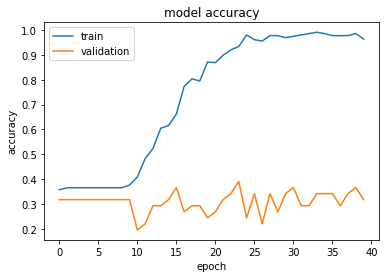

In [67]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

### File sanitization function and load the model

In [68]:
# Prepare the input file (image)
def prepare(file):
    IMG_SIZE = 50
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(1, IMG_SIZE, IMG_SIZE, 1)

In [69]:
# Load Model
model = tf.keras.models.load_model(model_name)

## User Input

In [80]:
# Define what image you want to load and prepare it
input_image = "9.jpg"
image = prepare(input_image)

# Use the model to predict what the image is
prediction = model.predict(image)
prediction = list(prediction[0])
print(CATEGORIES[prediction.index(max(prediction))])

De La Riva
